In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

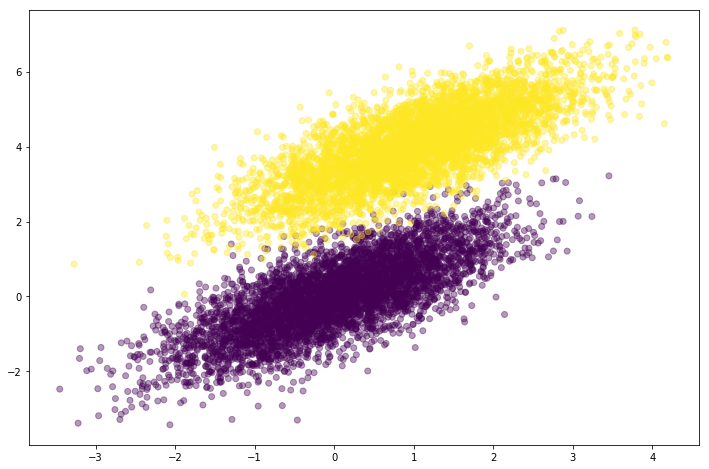

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [4]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print log_likelihood(features, target, weights)
        
    return weights

In [5]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.7067227680536
-142.96493623107844
-141.54530307157367
-141.060319659308
-140.87031585891606
-140.79025912753815
-140.75505002269915
-140.73914503180956
-140.7318349891588
-140.72843666694823
-140.7268447125533
-140.72609508950472
-140.72574086052302
-140.72557306887174
-140.72549345786172
-140.72545564250743
-140.7254376661433
-140.72542911609156
-140.72542504794777
-140.725423111817
-140.72542219020232
-140.7254217514527
-140.7254215425613
-140.7254214431011
-140.72542139574284
-140.7254213731925
-140.7254213624546
-140.72542135734142
-140.72542135490644


In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

print clf.intercept_, clf.coef_
print weights

[-13.99400797] [[-5.02712572  8.23286799]]
[-14.09225541  -5.05899648   8.28955762]


In [7]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print 'Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds))
print 'Accuracy from sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


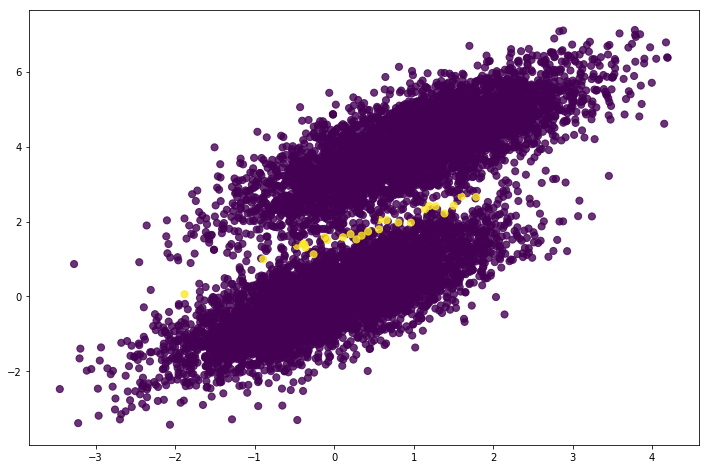

In [8]:
plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)
